In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

    Source_IP  Source_PORT  Destination_IP  Destination_PORT  TYPE_Protokol  \
0  3232257838        50925      3232258764              7680              3   
1  3232257838        50928       167840013              7680              1   
2  3232257838        50931       167840005              7680              1   
3  3232257838        50925      3232258764              7680              1   
4  3232257838        51100       167840062              7680              3   

   TotalLength  CSD_Payload_1Gram  CSD_Payload_2Gram  CSD_Payload_3Gram  \
0           78             4.1522             2.2304             0.2074   
1           40             1.0000             0.1736            75.6203   
2           40             1.0000             9.3783             5.8610   
3           40            72.4834             0.1330            14.7544   
4          202             6.4510             0.1916             6.0957   

   CSD_Payload_4Gram  CSD_Payload_5Gram  CSD_Payload_6Gram  CS_Payload_1Gr

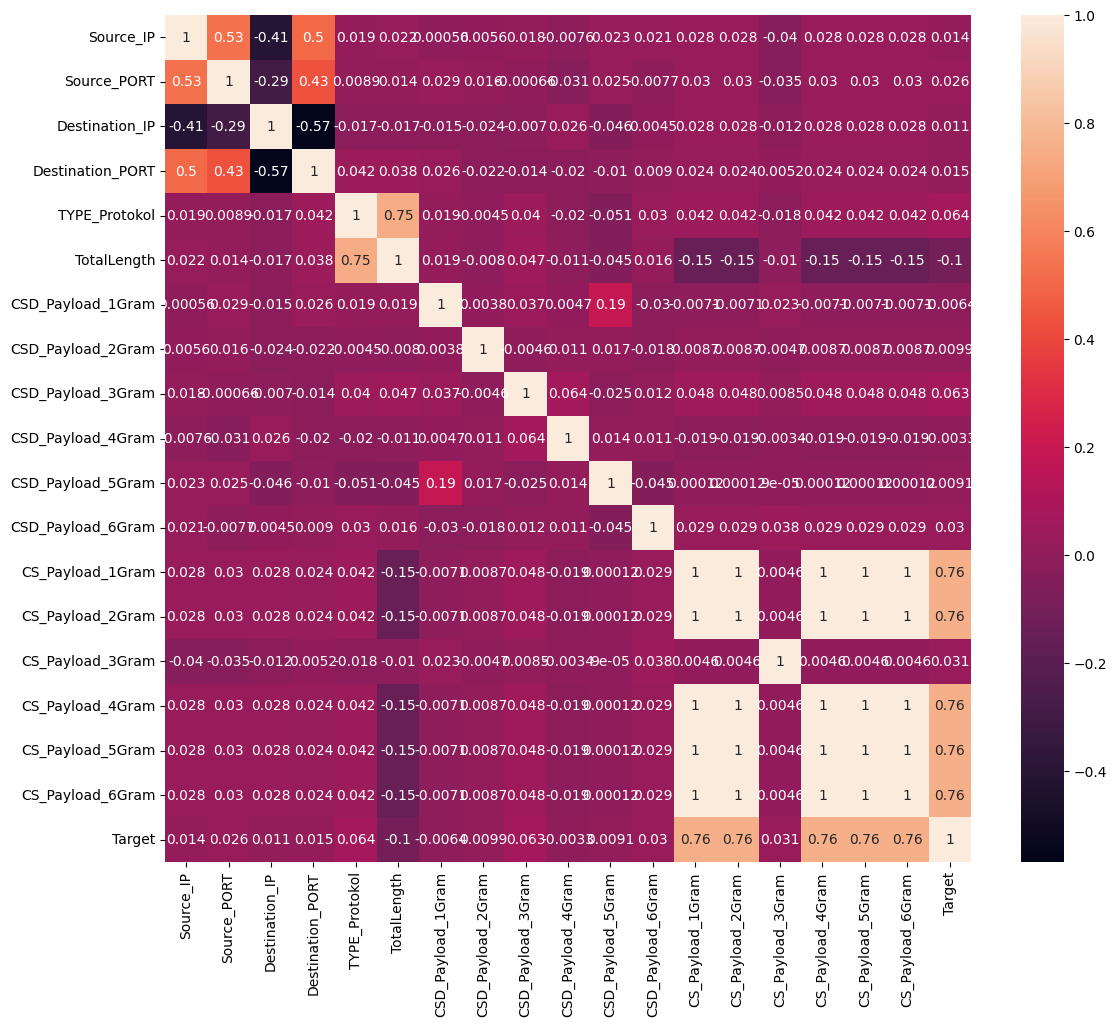

In [2]:
df = pd.read_csv('C:\\Users\\balak\\OneDrive\\Desktop\\DDOS Project\\PREVENTION-OF-DDOS-ATTACKS-USING-ML-IN-CLOUD-ENVIRONMENT-main\\DDoS Dataset.csv')
X = df.drop(columns=['Target'])
Y = df['Target']
print(df.head())

plt.figure(figsize=(13, 11))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [3]:
# navie bayes
from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB()
X_train, X_test, Y_Train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=21)
NB_model.fit(X_train, Y_Train)
X_train_prediction = NB_model.predict(X_train)
train_acc = accuracy_score(X_train_prediction, Y_Train)
print("NB_Training accuracy: ", train_acc)

X_test_prediction = NB_model.predict(X_test)
test_acc = accuracy_score(X_test_prediction, Y_test)
print("NB_Testing accuracy: ", test_acc)


NB_Training accuracy:  0.5591810620601407
NB_Testing accuracy:  0.5524296675191815


In [4]:
# Knearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

sts = MinMaxScaler()
X_trs = sts.fit_transform(X)
KNN_model = KNeighborsClassifier(n_neighbors=7)
X_train, X_test, Y_Train, Y_test = train_test_split(X_trs, Y, test_size=0.2, stratify=Y, random_state=21)
KNN_model.fit(X_train, Y_Train)
X_train_prediction = KNN_model.predict(X_train)
train_acc = accuracy_score(X_train_prediction, Y_Train)
print("\nKNN_Training accuracy: ", train_acc)

X_test_prediction = KNN_model.predict(X_test)
test_acc = accuracy_score(X_test_prediction, Y_test)
print("KNN_Testing accuracy: ", test_acc)


KNN_Training accuracy:  0.982085732565579
KNN_Testing accuracy:  0.9744245524296675


In [5]:
# Logistic regression

from sklearn.linear_model import LogisticRegression

log_classifier = LogisticRegression(random_state=0)
X_train, X_test, Y_Train, Y_test = train_test_split(X_trs, Y, test_size=0.2, stratify=Y, random_state=22)
log_classifier.fit(X_train, Y_Train)

logreg_X_train_prediction = log_classifier.predict(X_train)
train_acc = accuracy_score(logreg_X_train_prediction, Y_Train)
print("\nLog_regression_Training accuracy: ", train_acc)

logreg_X_test_prediction = log_classifier.predict(X_test)
test_acc = accuracy_score(logreg_X_test_prediction, Y_test)
print("Log_regression_Testing accuracy: ", test_acc)


Log_regression_Training accuracy:  0.9974408189379399
Log_regression_Testing accuracy:  0.9948849104859335
